In [89]:
from sklearn.datasets import make_circles, make_classification
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.semi_supervised import SelfTrainingClassifier, LabelPropagation
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [4]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0)
# X, y = make_classification(n_samples=1000, n_features=2, n_informative=2)

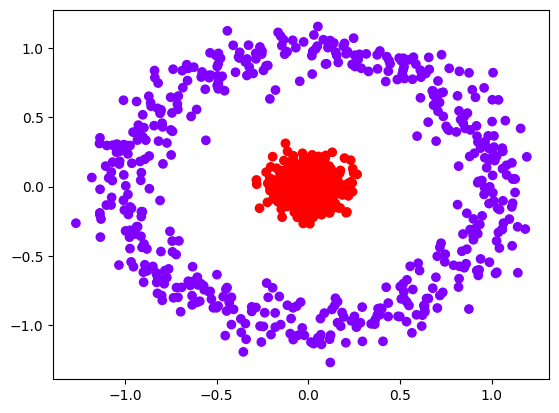

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [27]:
g = 3

In [36]:
train_0_idx = np.random.choice(np.where(y_train == 0)[0], g)
train_1_idx = np.random.choice(np.where(y_train == 1)[0], g)

In [49]:
labelled_idx = np.concatenate([train_0_idx, train_1_idx])

X_train_labelled = X_train[labelled_idx, :]
y_train_labelled = y_train[labelled_idx]

X_train_not_labelled = np.delete(X_train, labelled_idx, axis=0)
y_train_not_labelled = np.delete(y_train, labelled_idx, axis=0)

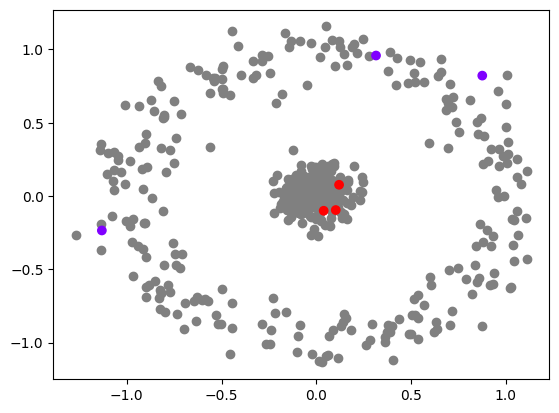

In [51]:
plt.scatter(X_train_not_labelled[:, 0], X_train_not_labelled[:, 1], color='gray')
plt.scatter(X_train_labelled[:, 0], X_train_labelled[:, 1], c=y_train_labelled, cmap='rainbow')

In [56]:
X_train_combined = np.concatenate([X_train_labelled, X_train_not_labelled], axis=0)

y_unlabelled_fake = -1 * np.ones(len(X_train_not_labelled), dtype=int)
y_train_combined = np.concatenate([y_train_labelled, y_unlabelled_fake], axis=0)

In [87]:
def eval_model(model, fit_normally=False):
    if fit_normally:
        model.fit(X_train_labelled, y_train_labelled)
    else:
        model.fit(X_train_combined, y_train_combined)
    y_test_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_test_pred)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='rainbow', edgecolor='k')
    axs[0].set_title(f'Predicted labels (accuracy: {acc:.2f})')

    axs[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='rainbow', edgecolor='k')
    axs[1].set_title('True labels')

    plt.tight_layout(rect=[0, 0, 1, 0.90])

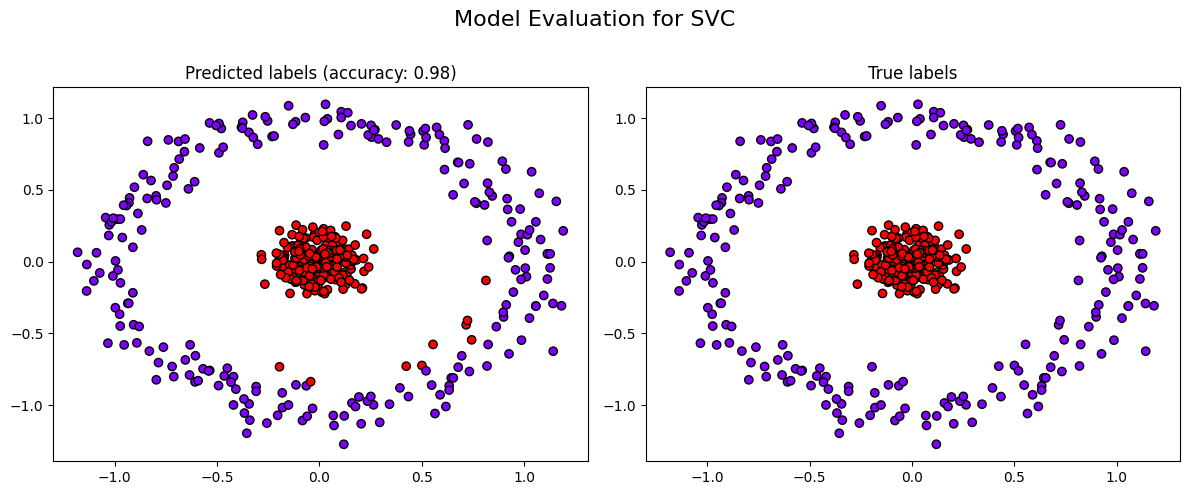

In [91]:
model = SVC(probability=True)
eval_model(model, fit_normally=True)
plt.suptitle('Model Evaluation for SVC', fontsize=16)
plt.show()

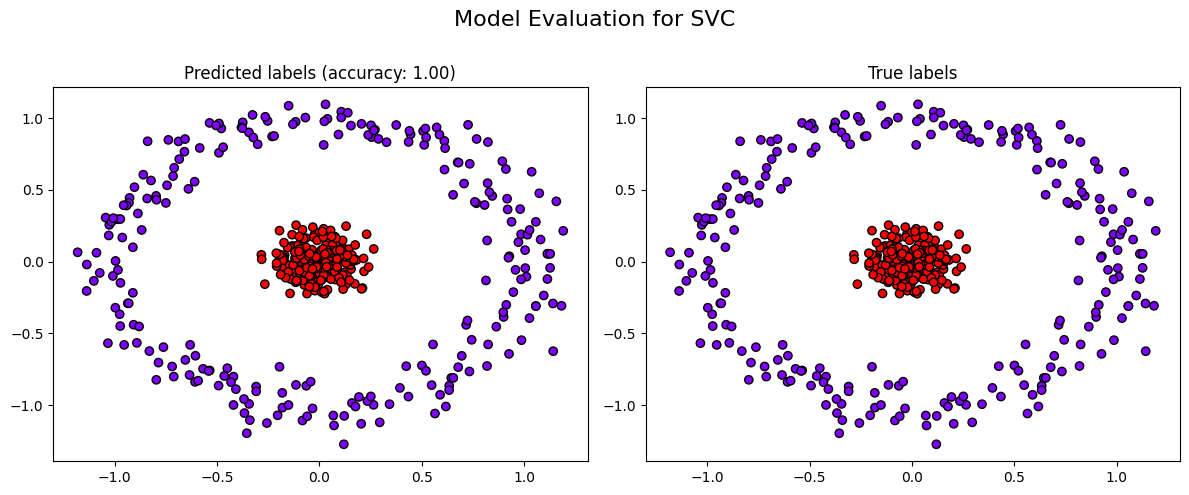

In [90]:
model = SelfTrainingClassifier(estimator=SVC(probability=True))
eval_model(model)
plt.suptitle('Model Evaluation for Self-training with SVC estimator', fontsize=16)
plt.show()

/home/samba/sroczykd/.pyenv/versions/3.10.16/envs/adv_ml/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:324: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


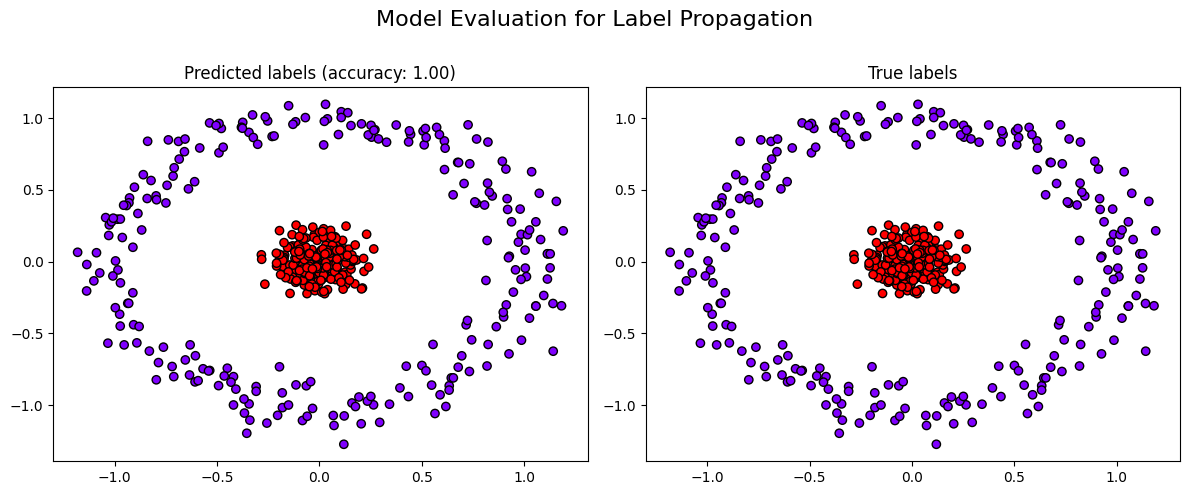

In [93]:
model = LabelPropagation()
eval_model(model)
plt.suptitle('Model Evaluation for Label Propagation', fontsize=16)
plt.show()